In [5]:
!pip install tweepy
!pip install pymongo
!pip install wordcloud
!pip install stop_words
!pip install nltk
!pip install textblob
!pip install googletrans
!pip install py_translator==2.1.9
!pip install emoji
!pip install ipywidgets
!pip install sklearn
!pip install re

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32921 sha256=7df9b99da55dcbfeab7f140a982ebb476566bfe2854e3b49e06df8ba7cf3921d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\eb\03\0d\3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=88c3a8603d211d51cde2a104d399ddecb9db99ffc7b4373e435623d3ed500d54
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


ERROR: Could not find a version that satisfies the requirement py_translator==2.1.9 (from versions: none)
ERROR: No matching distribution found for py_translator==2.1.9


  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=f472eea0f1a3d2f4c1fb93a7e049e72c6c17cdf40bbc0d1bea9ee71acfba02fd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=03b3c0d58278aadbf5819a7e407d29f69516bfb3266d3bd64d921f706e53ea62
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [21]:
import sys

In [22]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [23]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" 
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" 
access_token = "100875722-7m5vhOzpw2LYrB7P8ISnTqtGYMMvVTqwx3X4EyJY" 
access_token_secret = "uPEymGiszhiJEVWD4Alo1pzMUJx1ymo3Fd4HWyRPRBN3r" 

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["delhielection2020"]["Modi290120"]
col.count()

<ipython-input-23-cd195be50175>:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  col.count()


3000

In [24]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=3000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        
        self.counter += 1
        
        
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
           
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=3000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["2020",
            "America","Donald Trump",""
           ]


progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)


for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:01:02.701136
Tweets/Sec: 48.4
Tweets collected: 3000
Total tweets in collection: 6000


<ipython-input-24-97869ae8955a>:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  print("Total tweets in collection: %s" % col.count())


In [25]:
col.find_one()

{'_id': ObjectId('5f8d109f6c221502795780fc'),
 'created_at': 'Mon Oct 19 04:05:44 +0000 2020',
 'id': 1318040613397344256,
 'id_str': '1318040613397344256',
 'text': 'banking ; Punjab National Bank customers will now be able to do many things like knowing the fund transfer and chec… https://t.co/XTKNBl7Oh9',
 'source': '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4096372212,
  'id_str': '4096372212',
  'name': 'News 24 Haryana',
  'screen_name': 'Ramsukhi1',
  'location': 'Sonipat, India',
  'url': 'http://news24haryana.com',
  'description': 'ONWER NEWS 24 HARYANA',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 25,
  'friends_count': 278,
  'listed_count': 0,
  'favourites_count': 9,
  'statuses_count': 210,
  'cre

In [27]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)

dataset

,created_at,text,user,source,lang
0,Mon Oct 19 04:05:44 +0000 2020,banking ; Punjab National Bank customers will ...,@Ramsukhi1,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",und
1,Mon Oct 19 04:05:44 +0000 2020,SÍNTESIS DEPORTIVA|Se complican las eliminator...,@nvenezuela19,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",es
2,Mon Oct 19 04:05:44 +0000 2020,RT @GalatasaraySK: #BugünGünlerdenGALATASARAY\...,@MsSezenler,"<a href=""http://twitter.com/download/android"" ...",tr
3,Mon Oct 19 04:05:44 +0000 2020,RT @shyuk_kiyowo: Sempatkan vote sebelum tidur...,@VaisnavaPutri,"<a href=""http://twitter.com/download/android"" ...",in
4,Mon Oct 19 04:05:44 +0000 2020,RT @chaelinCL: +H₩A+ \n\n#HWA #2020.10.29 #CL ...,@_mmmnut,"<a href=""http://twitter.com/download/android"" ...",und
...,...,...,...,...,...
5995,Mon Oct 19 04:19:40 +0000 2020,2020/10/19 80→102,@__zoowall,"<a href=""http://twitter.com/download/iphone"" r...",und
5996,Mon Oct 19 04:19:40 +0000 2020,RT @jbrous41: Dr. Fauci: Cancelling Thanksgivi...,@MarlonJBlake,"<a href=""http://twitter.com/download/android"" ...",en
5997,Mon Oct 19 04:19:40 +0000 2020,RT @bitchrubyjane: jenningman\n\n2018: ...,@ysaaanini,"<a href=""http://twitter.com/download/android"" ...",is
5998,Mon Oct 19 04:19:40 +0000 2020,@pattonoswalt If this isn’t what they use for ...,@JoelAdamRussell,"<a href=""http://twitter.com/download/iphone"" r...",en


In [28]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,4811
1,https,2730
2,co,2630
3,2020,2178
4,the,1905
5,to,1095
6,in,1040
7,10,834
8,of,817
9,is,776


<ipython-input-29-a8481ec67a37>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.source_name = dataset.source.apply(get_source_name)


Aztalk                    6
IFTTT                     7
twittbot.net             12
Echoes Act2              24
TweetDeck                26
WordPress.com            57
Twitter for iPad        196
Twitter Web App        1029
Twitter for iPhone     2198
Twitter for Android    2253
Name: source, dtype: int64

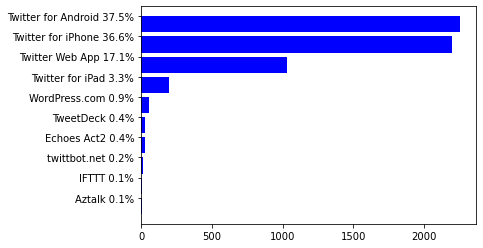

In [29]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

tl       27
hi       52
pt       97
ko      150
in      192
th      205
und     213
es      410
ja     1044
en     3371
Name: lang, dtype: int64

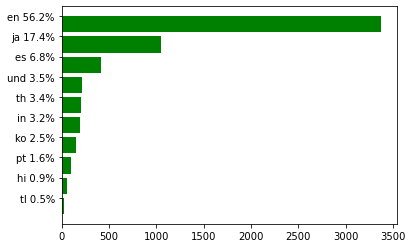

In [30]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [31]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [32]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)

is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
6,1318040613565222912,RT @kingsrush: The party that has been lying a...,en
7,1318040613699219456,RT @JYPETWICE: TWICE\nTHE 2ND FULL ALBUM\nEyes...,en
8,1318040613657272321,RT @getlike_p: Def need a 2020 World Series je...,en
12,1318040613762129920,RT @MLBONFOX: The 2020 World Series is set! 🏆\...,en
14,1318040613770698752,RT @ReallyAmerican1: America is #StrongerWithB...,en
...,...,...,...
5992,1318044119860613120,RT @rolandwagner05: German News(18.10.2020) co...,en
5994,1318044119923630081,RT @JoeBiden: Wear a mask. Wash your hands. Vo...,en
5996,1318044119944417281,RT @jbrous41: Dr. Fauci: Cancelling Thanksgivi...,en
5998,1318044120066252801,@pattonoswalt If this isn’t what they use for ...,en


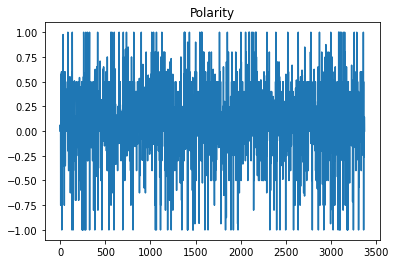

In [33]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

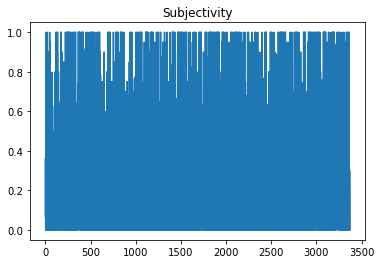

In [34]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [35]:
import statistics
statistics.mean(poltweet.polarity)

0.06221815967195908

In [36]:
import statistics
statistics.mean(poltweet.subjectivity)

0.3349548347649801

In [37]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [38]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100


a = dataset1['text'].str.lower().str.cat(sep=' ')


b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


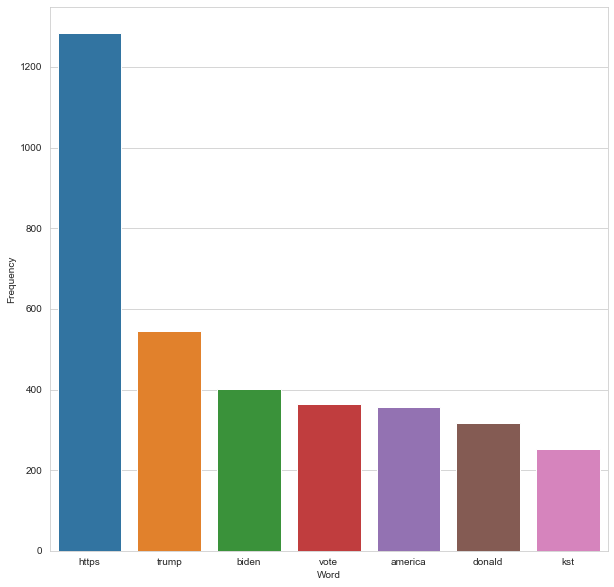

In [39]:
import seaborn as sns
 
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        


word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

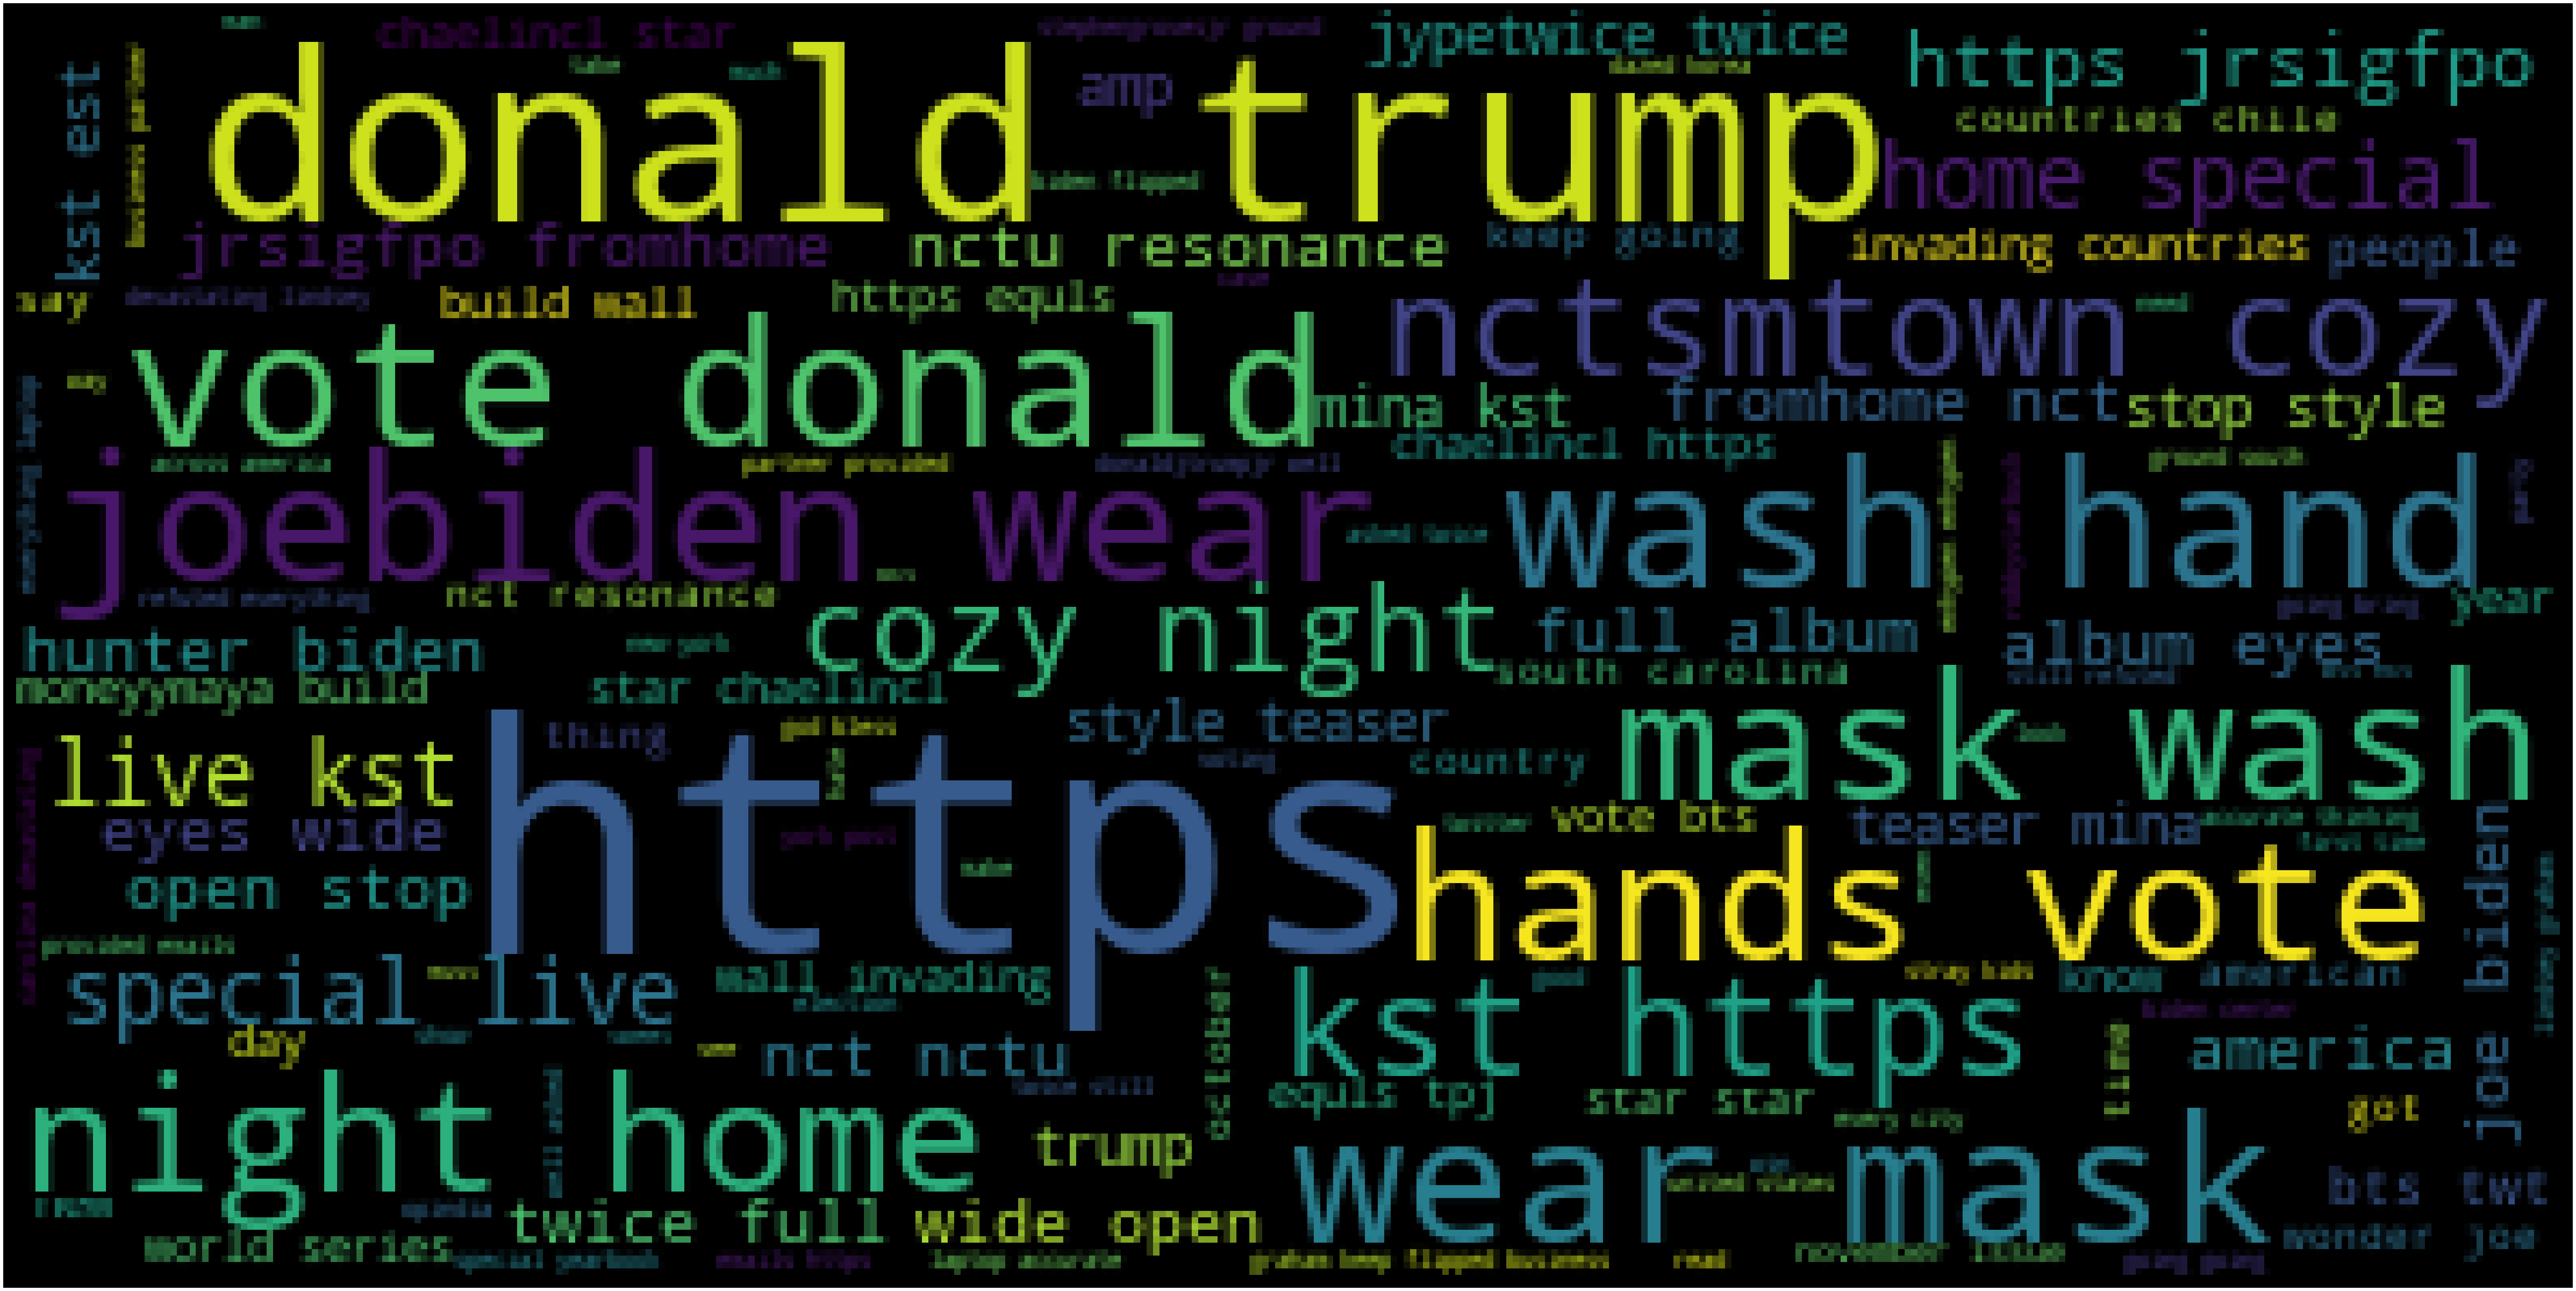

In [40]:
wc(cleaned_data_title,'black','Common Words' )

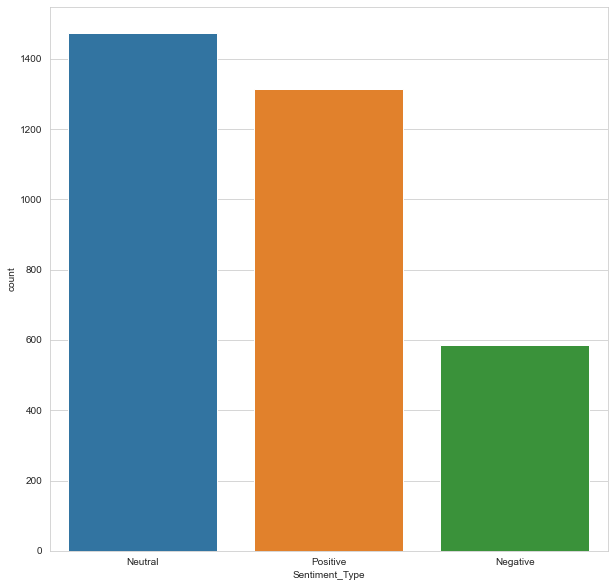

In [41]:
from textblob import TextBlob

bloblist_desc = list()

twit=dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [42]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'60.80'